# Project for the course: Computational Mathematics
## Group 1: Fois Giulia, Manini Nicolas

 ### Analysis for the core random dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read the summary csv, and the csv containing the execution logs for each task

In [2]:
DatasetFolder = 'Core_TimeComp'
SummaryFile = 'summary.csv'
LogsFolder = 'logs'

summary_path = "{}/{}".format(DatasetFolder, SummaryFile)
logs_path = "{}/{}".format(DatasetFolder, LogsFolder)

In [3]:
dfSum = pd.read_csv(summary_path)
TaskNames = dfSum['InputName']

def getTaskNames(batch, batchidx):
    batch = str(batch)
    batchidx=str(batchidx)
    isTask = lambda x: (x.split('_')[1]==batch) & (x.split('_')[2]==batchidx)
    return list(filter(isTask, TaskNames))

dfSum['Batch'] = dfSum['InputName'].str.split('_').str[1]
dfSum['BatchIndex'] = dfSum['InputName'].str.split('_').str[2]
dfSum['KIndex'] = dfSum['InputName'].str.split('_').str[3]

dfSum['Batch'] = dfSum['Batch'].astype(int)
dfSum['BatchIndex'] = dfSum['BatchIndex'].astype(int)
dfSum['KIndex'] = dfSum['KIndex'].astype(int)

dfSum['TimeIter'] = dfSum['Our_time'].div(dfSum['Our_Iter'])
dfSum['TimeDelta_1Iter'] = dfSum['Svd_time'] - dfSum['TimeIter']
dfSum['ConvenientIters'] = np.floor(dfSum['Svd_time'] .div(dfSum['TimeIter']))

Batches = (dfSum['Batch'].unique())
Batches.sort()

In [4]:
import os

dfLogs = {}

# Read all execution logs
for filename in filter(lambda x:x.endswith(".csv"), os.listdir(logs_path)):
    fn = os.path.splitext(filename)[0]
    name = fn[5:]
    dfTemp = pd.read_csv("{}/{}".format(logs_path, filename))
    dfTemp['ErrorRatio'] = (abs(dfTemp['Error'] - dfTemp['Error'].shift(1))).div(dfTemp['Error'].shift(1))
    dfLogs[name] = dfTemp  

In [5]:
dfSum

,InputName,InputM,InputN,InputRk,TargetRk,Opt_delta,Our_delta,Delta_diff,Svd_time,Our_time,Time_gain,Our_Iter,Batch,BatchIndex,KIndex,TimeIter,TimeDelta_1Iter,ConvenientIters
0,rnd_1_1_1,50,50,50,2,0.936161,0.936226,6.476296e-05,0.000964,0.158193,-0.157229,86,1,1,1,0.001839,-0.000876,0.0
1,rnd_1_1_2,50,50,50,25,0.346226,0.346247,2.047998e-05,0.000964,0.410290,-0.409326,264,1,1,2,0.001554,-0.000590,0.0
2,rnd_1_1_3,50,50,50,49,0.004460,0.004460,2.419247e-08,0.000964,0.098637,-0.097673,46,1,1,3,0.002144,-0.001181,0.0
3,rnd_1_2_1,50,50,50,2,0.952536,0.952617,8.132196e-05,0.000571,0.066587,-0.066016,129,1,2,1,0.000516,0.000055,1.0
4,rnd_1_2_2,50,50,50,25,0.425626,0.425644,1.844158e-05,0.000571,0.088255,-0.087683,65,1,2,2,0.001358,-0.000786,0.0
5,rnd_1_2_3,50,50,50,49,0.010658,0.010658,3.629991e-09,0.000571,0.051268,-0.050697,22,1,2,3,0.002330,-0.001759,0.0
6,rnd_1_3_1,50,50,50,2,0.944181,0.944200,1.856520e-05,0.000559,0.074618,-0.074059,153,1,3,1,0.000488,0.000071,1.0
7,rnd_1_3_2,50,50,50,25,0.405411,0.405483,7.142398e-05,0.000559,0.128772,-0.128213,89,1,3,2,0.001447,-0.000888,0.0
8,rnd_1_3_3,50,50,50,49,0.004293,0.004293,4.120461e-10,0.000559,0.028092,-0.027533,11,1,3,3,0.002554,-0.001995,0.0
9,rnd_2_1_1,100,100,100,2,0.968055,0.968114,5.959842e-05,0.001793,0.103710,-0.101917,72,2,1,1,0.001440,0.000352,1.0


In [18]:
dfGrouped = dfSum[['InputM', 'TargetRk', 'Svd_time', 'Our_time', 'TimeIter']].groupby(['InputM', 'TargetRk']).mean()

dfGroup2 = dfGrouped[dfGrouped.index.get_level_values(1)==2]
dfGroupHalf = dfGrouped[dfGrouped.index.get_level_values(1)==dfGrouped.index.get_level_values(0)/2]
dfGroupMinus1 = dfGrouped[dfGrouped.index.get_level_values(1)==dfGrouped.index.get_level_values(0)-1]

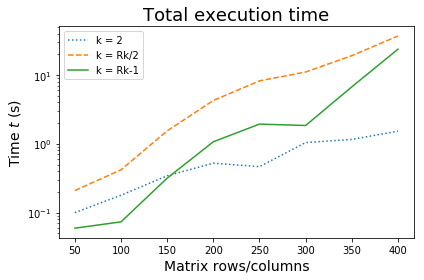

In [31]:
frames = [dfGroup2, dfGroupHalf, dfGroupMinus1]
labels = ['k = 2', 'k = Rk/2', 'k = Rk-1']
style = [':', '--', '-']
plt.yscale('log')

for dfTmp, lab, sty in zip(frames, labels, style):
    xax = dfTmp.index.get_level_values(0)
    yax = dfTmp.Our_time
    plt.plot(xax,yax, label=lab, linestyle=sty)

plt.legend(loc='best')
plt.title(r'Total execution time', fontsize=18)
plt.xlabel("Matrix rows/columns", fontsize=14)
plt.ylabel(r'Time $t$ (s)', fontsize=14)
plt.tight_layout()
plt.savefig('core_comparison_total.png', format='png', dpi=300)
plt.show()

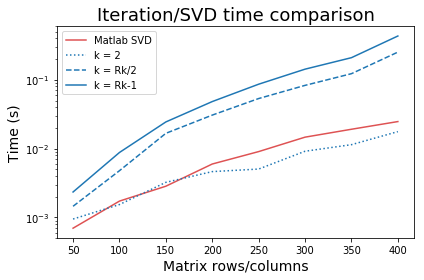

In [46]:
frames = [dfGroup2, dfGroupHalf, dfGroupMinus1]
labels = ['k = 2', 'k = Rk/2', 'k = Rk-1']
style = [':', '--', '-']
plt.yscale('log')

xax = dfGroup2.index.get_level_values(0)
yax = dfGroup2.Svd_time
plt.plot(xax, yax, color='tab:red', label='Matlab SVD', alpha=0.8)

for dfTmp, lab, sty in zip(frames, labels, style):
    xax = dfTmp.index.get_level_values(0)
    yax = dfTmp.TimeIter
    plt.plot(xax,yax, label=lab, linestyle=sty, color='tab:blue')

plt.legend(loc='best')
plt.title(r'Iteration/SVD time comparison', fontsize=18)
plt.xlabel("Matrix rows/columns", fontsize=14)
plt.ylabel(r'Time (s)', fontsize=14)
plt.tight_layout()
plt.savefig('core_comparison_iteration.png', format='png', dpi=300)
plt.show()